# **FINAL PROJECT**
---

## Import Libraries

In [4]:
# Import library
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [5]:
# Loading dataframe
df = pd.read_csv('skincare_clean.csv')

In [6]:
df.head(3)

,product_type,brand,product,rating,review_count,url,image_url,price,description,unique_id
0,cleanser,Cetaphil,Gentle Skin Cleanser,4.2,15298,https://reviews.femaledaily.com/products/clean...,https://image.femaledaily.com/dyn/210/images/p...,112000.0,Cetaphil Gentle Skin Cleanser mengandung formu...,Cetaphil - Gentle Skin Cleanser
1,cleanser,Senka,Perfect Whip Facial Foam,4.2,6374,https://reviews.femaledaily.com/products/clean...,https://image.femaledaily.com/dyn/210/images/p...,200000.0,Shiseido Perfect Whip adalah pembersih wajah u...,Senka - Perfect Whip Facial Foam
2,cleanser,Acnes,Creamy Wash,3.7,5510,https://reviews.femaledaily.com/products/clean...,https://image.femaledaily.com/dyn/210/images/p...,29000.0,Acnes Creamy Wash adalah sabun pembersih wajah...,Acnes - Creamy Wash


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_type  788 non-null    object 
 1   brand         788 non-null    object 
 2   product       788 non-null    object 
 3   rating        788 non-null    float64
 4   review_count  788 non-null    int64  
 5   url           788 non-null    object 
 6   image_url     788 non-null    object 
 7   price         788 non-null    float64
 8   description   788 non-null    object 
 9   unique_id     788 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 61.7+ KB


## Data Checking

In [8]:
# show columns name & remove white space
df.columns = df.columns.str.strip()
df.columns

Index(['product_type', 'brand', 'product', 'rating', 'review_count', 'url',
       'image_url', 'price', 'description', 'unique_id'],
      dtype='object')

In [9]:
df.isnull().sum()

product_type    0
brand           0
product         0
rating          0
review_count    0
url             0
image_url       0
price           0
description     0
unique_id       0
dtype: int64

In [10]:
# check duplicate data
duplicates = df.duplicated().sum()
duplicates

0

In [11]:
df.nunique()

product_type      5
brand           208
product         763
rating           37
review_count    457
url             788
image_url       788
price           325
description     787
unique_id       788
dtype: int64

In [12]:
df['product_type'].value_counts()

product_type
moisturizer       179
serum/essence     164
cleanser          159
sun protection    156
toner             130
Name: count, dtype: int64

In [13]:
df['brand'].value_counts()

brand
Wardah                31
Pond's                29
L'Oreal Paris         24
Azarine Cosmetic      23
Somethinc             20
                      ..
3W CLINIC              1
Facetology             1
Sunday Riley           1
Finally Found You!     1
A.Stop                 1
Name: count, Length: 208, dtype: int64

In [14]:
# Backup the data
backup1 = df.copy()

# **Exploratory Data Analytics (EDA)**

### **1) Favorite Brands**

In [15]:
top_brandrating = df.groupby(['brand'])['rating'].sum().sort_values(ascending=False).head(10)
top_brandrating

brand
Wardah              122.82
Pond's              108.20
L'Oreal Paris       101.50
Azarine Cosmetic     98.90
Somethinc            83.90
AVOSKIN              72.00
The Body Shop        69.52
Innisfree            66.89
Garnier              57.90
Raiku Beauty         51.31
Name: rating, dtype: float64

/var/folders/_p/tz0d3gfs0gn4vr1kpxq_tq840000gn/T/ipykernel_41093/555371417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brandrating.values, y=top_brandrating.index, palette="inferno")


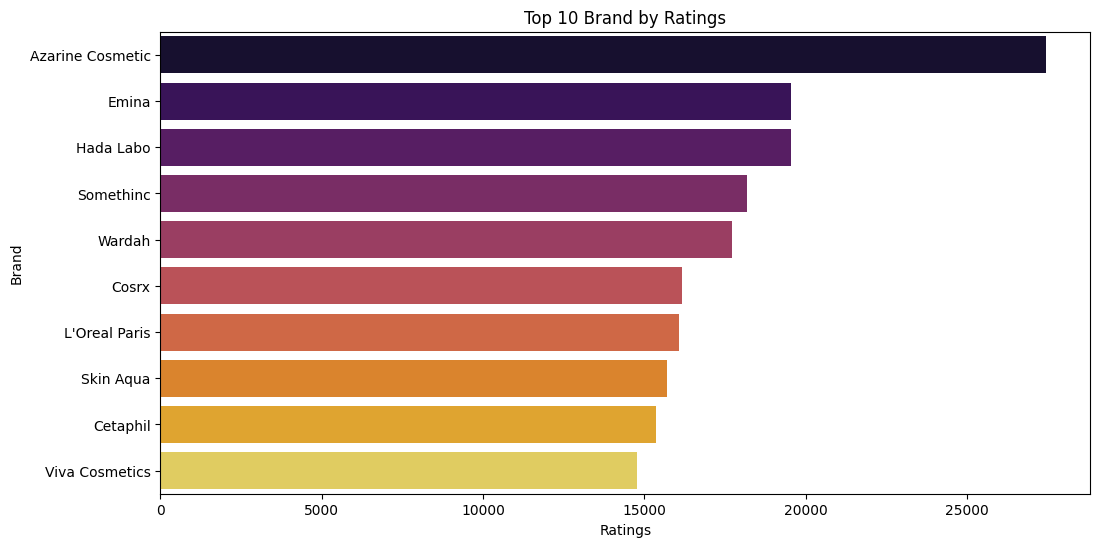

In [36]:
# bar horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brandrating.values, y=top_brandrating.index, palette="inferno")

# set label and titel
plt.title('Top 10 Brand by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Brand')

# show plot
plt.show()

### *Insight :*
Dapat dilihat dari plot diatas, Wardah, Ponds, dan Loreal sebagai brand yang sudah lama berdiri, menjadi Top 3 brand yang mendapat rating tertinggi dari perempuan Indonesia.   
Lalu diikuti oleh startup brand lokal yaitu Azarine, Somethinc, dan Avoskin, yang termasuk startup kecantikan yang unggul dalam melakukan inovasi produk.   
Dapat disimpulkan konsumen produk kecantikan di Indonesia mementingkan reputasi brand dan kualitas produk dalam memilih produk skincare yang mereka gunakan.

### **2) Top Engagement Brand**

In [17]:
top_brandrating = df.groupby(['brand'])['review_count'].sum().sort_values(ascending=False).head(10)
top_brandrating

brand
Azarine Cosmetic    27445
Emina               19555
Hada Labo           19536
Somethinc           18189
Wardah              17720
Cosrx               16149
L'Oreal Paris       16059
Skin Aqua           15706
Cetaphil            15364
Viva Cosmetics      14766
Name: review_count, dtype: int64

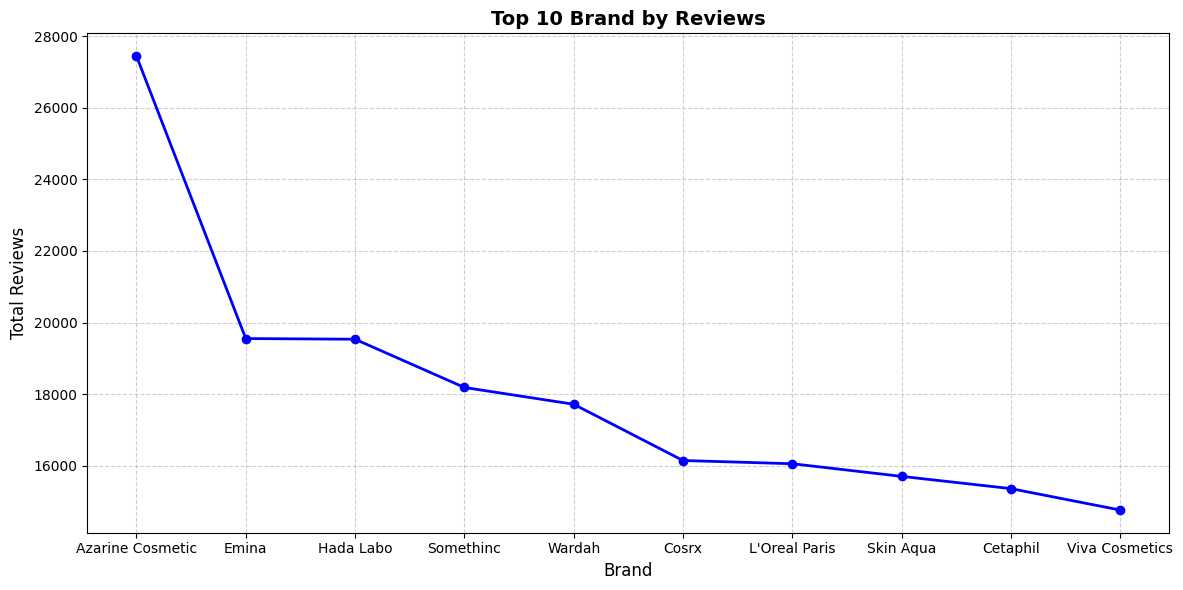

In [39]:
plt.figure(figsize=(12, 6))

# buat line chart
plt.plot(top_brandrating.index, top_brandrating.values, 
         marker='o', linestyle='-', color='blue', linewidth=2)

# set label dan title
plt.title('Top 10 Brand by Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### *Insight :*
Lima brand teratas yang paling banyak mendapatkan review atas produk-produknya adalah Azarine, Emina, Hada Labo, Somethinc, dan Wardah.   
Kelima brand tersebut banyak mendapatkan review konsumen karena inovasi dan variasi atas produk yang dikeluarkan dan juga termasuk kategori produk skincare terjangkau.

Lalu ada Cosrx sebagai satu-satunya brand skincare asal Korea yang banyak mendapat perhatian, yang juga karena kualitas dan value-for-money atas produk yang dikeluarkan sehingga mendapat kepercayaan para perempuan Indonesia.

### **3) Top Engagement Product Type**

In [19]:
top_productreviews = df.groupby(['product_type'])['review_count'].sum().sort_values(ascending=False).head(10)
top_productreviews

product_type
serum/essence     121006
sun protection     97746
cleanser           91298
toner              76058
moisturizer        63769
Name: review_count, dtype: int64

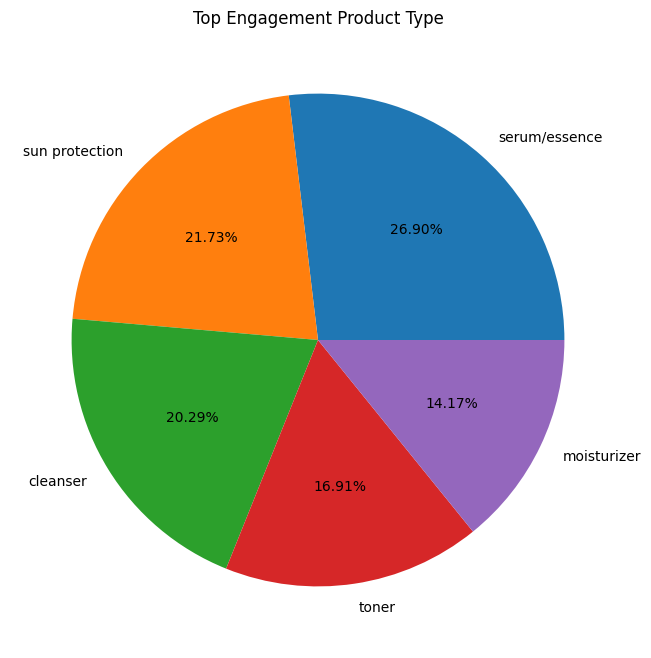

In [34]:
df.groupby('product_type')['review_count'].sum().sort_values(ascending=False)\
.plot(kind='pie',
        autopct = '%.2f%%',
        figsize=(8,8),
        ylabel="",
        title= "Top Engagement Product Type" )

plt.show()

### *Insight :*
Dari lima tipe produk, serum/essence menjadi produk yang paling banyak mendapat review konsumen.   
Hal ini dikarenakan serum merupakan produk skincare yang bertujuan untuk menyelesaikan target masalah kesehatan kulit konsumen.

Lalu kategori selanjutnya yang banyak mendapat perhatian adalah sun protection dan cleanser, yang merupakan bagian dari rutinitas dasar sehari-hari dalam menggunakan skincare.

### **4) Top Engagement Products**

In [22]:
top_productreviews = df.groupby(['unique_id'])['review_count'].sum().sort_values(ascending=False).head(10)
top_productreviews

unique_id
Emina - Sun Protection SPF 30 PA+++                               15719
Cetaphil - Gentle Skin Cleanser                                   15298
Azarine Cosmetic - Hydrasoothe Sunscreen Gel SPF 45+++            14814
Skin Aqua - UV Moisture Milk                                      10475
Biore - UV Aqua Rich Watery Essence SPF 50+ PA++++                 7883
Somethinc - Niacinamide + Moisture Sabi Beet Brightening Serum     6559
Senka - Perfect Whip Facial Foam                                   6374
Hada Labo - Gokujyun Ultimate Moisturizing Lotion                  5986
Acnes - Creamy Wash                                                5510
The Ordinary - Niacinamide 10% + Zinc 1%                           5462
Name: review_count, dtype: int64

/var/folders/_p/tz0d3gfs0gn4vr1kpxq_tq840000gn/T/ipykernel_41093/4123663626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productreviews.values, y=top_productreviews.index, palette="viridis")


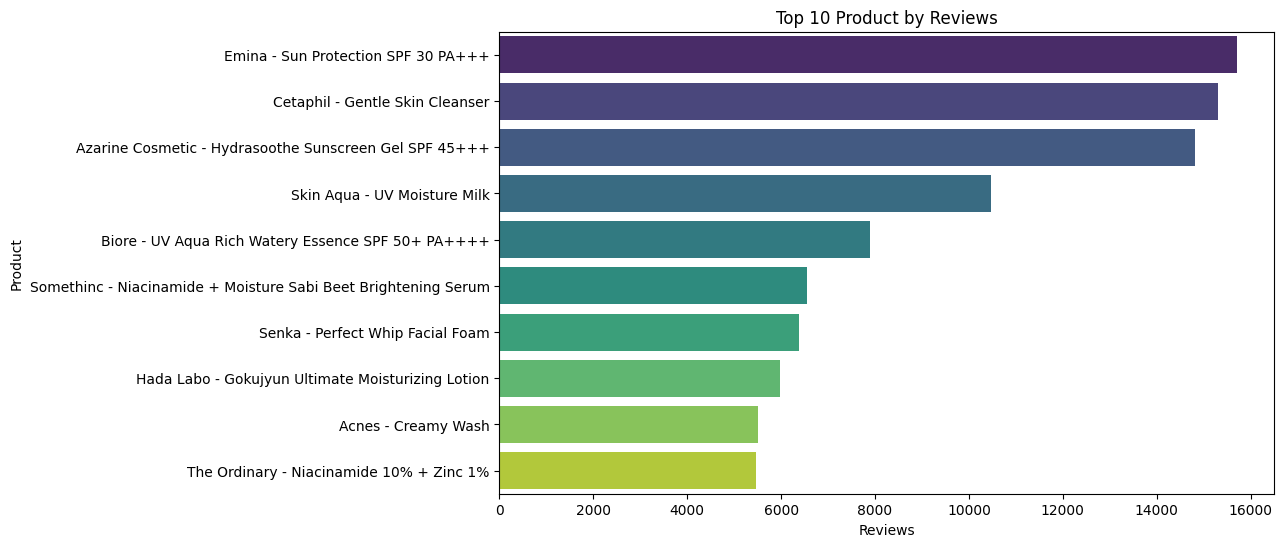

In [40]:
# bar horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=top_productreviews.values, y=top_productreviews.index, palette="viridis")

# set label and titel
plt.title('Top 10 Product by Reviews')
plt.xlabel('Reviews')
plt.ylabel('Product')

# show plot
plt.show()

### *Insight :*
Dari plot diatas, lima produk yang memiliki review terbanyak, empat produk merupakan produk sun protection, yaitu dari Emina, Azarine, Skin Aqua, dan Biore.   
Dan satu produk merupakan produk cleanser yang aman dari Cetaphil.

Kedua kategori produk tersebut merupakan bagian dari bagian skincare dasar.   
Hal ini menandakan tingginya kesadaran konsumen atas kebutuhan skincare dasar dan pentingnya pemakaian sunscreen di Indonesia sebagai negara tropis.

### **5) Price by Review**

In [24]:
top_pricereviews = df.groupby(['price'])['review_count'].sum().sort_values(ascending=False).head(10)
top_pricereviews

price
54000.0     16495
26000.0     15719
112000.0    15298
29000.0     12264
35000.0     10851
48500.0     10475
140000.0     8211
69000.0      7955
115000.0     7715
200000.0     7704
Name: review_count, dtype: int64

/var/folders/_p/tz0d3gfs0gn4vr1kpxq_tq840000gn/T/ipykernel_41093/3731261433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pricereviews.values, y=top_pricereviews.index, palette="hls")


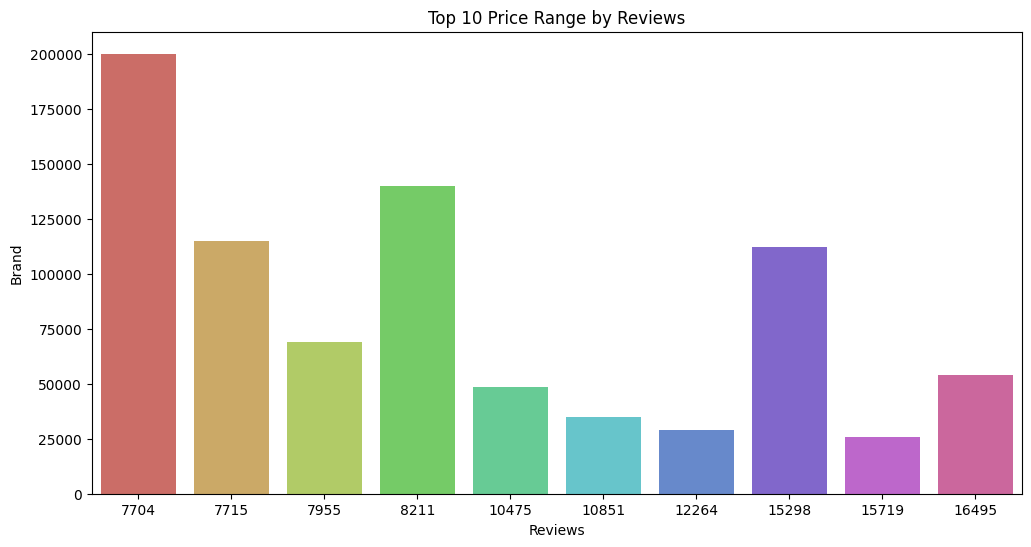

In [37]:
# bar horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pricereviews.values, y=top_pricereviews.index, palette="hls")

# set label and titel
plt.title('Top 10 Price Range by Reviews')
plt.xlabel('Reviews')
plt.ylabel('Brand')

# show plot
plt.show()

### *Insight :*
Dari berbagai jenis produk dengan beragam harga, konsumen paling banyak memberikan review pada produk di rentang harga 26.000-115.000.   
Dapat disimpulkan bahwa masyarakat Indonesia menyukai produk dengan harga terjangkau.   
Itulah mengapa brand seperti Azarine, Emina, dan Wardah yang menyasar middle-low customer berhasil mendapat tempat di masyarakat Indonesia.